<center>
<h4>Diplomatura AACSyA 2018 - FaMAF - UNC</h4>
<h1>Aprendizaje No Supervisado</h1>
<h2>Práctico 1 - Clustering</h2>
<hr>
Por David Gonzalez <leonardo.david.gonzalez@gmail.com> y Facundo Díaz Cobos <facundo.diaz.cobos@gmail.com>
</center>
<br/>

## Objetivos
En este práctico se explorarán diferentes soluciones de clustering, para desarrollar las capacidades de análisis de
soluciones de clustering. Es preferible que los conjuntos de datos con los que trabajar sean propios, ya que de esta
forma podrán aplicar su conocimiento del dominio en la interpretación de las diferentes soluciones. Alternativa-
mente, pueden usar conjuntos de datos de los ejemplos de la materia.
En los mismos, hacer una breve discusión del problema y explicar cómo puede ser útil usar técnicas de clustering.

# Consignas
Para cumplir los objetivos, realizar las siguientes actividades:

1 - Explorar soluciones con diferentes parámetros y compararlas. Por ejemplo, variar el número de clusters, las
métricas de distancia, el número de iteraciones o el número de veces que se inicializan las semillas. Describir
brevemente: número de clusters, población de cada cluster, algunas caracterı́sticas distintivas de cada cluster,
algunos elementos que se puedan encontrar en cada cluster.

2 - Incorporar un embedding como preproceso a los datos, aplicar los algoritmos de clustering después de ese
preproceso y describir la solución o soluciones resultantes, discutiendo las ventajas que resultan. Se pueden
usar:

◦ Principal
Component Analysis http://scikit-learn.org/stable/modules/generated/sklearn.
decomposition.PCA.html

◦ para texto, embeddings neuronales Gensim https://pypi.org/project/gensim/

◦ para texto, embeddings neuronales Fastext https://pypi.org/project/fasttext/

3 - Proponer (y en lo posible, implementar) métricas de evaluación de soluciones de clustering basadas en testigos.
Los testigos son pares de objetos que un experto de dominio etiqueta como “deberı́an estar en el mismo cluster”
o “deberı́an estar en distintos clusters”.

4 - El método k-means de scikit-learn no provee una forma sencilla de obtneer los objetos más cercanos al centroide
de un cluster. Proponga alguna forma de obtener una muestra de los elementos de un cluster que sean cercanos
al centroide, por ejemplo, usando clasificadores, usando distancia coseno, etc. En lo posible, implementarlos y
mostrar esos elementos, discutir la representatividad de los elementos encontrados.

# <u>PROBLEMA PRESENTADO</u>

CASO PROPUESTO: El experto de dominio necesita saber cuales son los clientes que poseen comportamiento de compra similar en el año 2017.  

Vamos a trabajar un set de datos correspondiente a compras reales de clientes realizadas en el año 2017 y algunas ventas del 2018. Los clientes fueron anonimizados previamente para poder ser utilizados en el ejercicio.

# <u>RESOLUCIÓN</u>

# Importando los datos:


In [2]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from yellowbrick.cluster.elbow import KElbowVisualizer
from sklearn.cluster import KMeans
from datetime import datetime

import numpy as np
np.random.seed(0)

# Configuramos el tamaño de los gráficos, en pulgadas
from pylab import rcParams
rcParams['figure.figsize'] = 18, 10

In [3]:
from util import check_dataset
check_dataset()

* Chequeando dataset de trabajo...
- Dataset OK.


In [4]:
from util import load_dataset
ventas_df = load_dataset()

* Importando dataset...
 - 1677680 registros importados.


# 1 - Explorar soluciones con diferentes parámetros y compararlas:

In [5]:
from IPython.display import display, HTML

In [6]:
display(HTML('<b>* Cantidad de Features: {0}</b>'.format(len(ventas_df.columns))))
display(ventas_df.columns)
display(ventas_df.head())

Index(['Unnamed: 0', 'CODIGO_CLIENTE', 'RAZON_SOCIAL', 'CUIT', 'CATEGORIA_IVA',
       'GRUPO_CANAL', 'CANAL', 'SUBCANAL', 'APERTURA_ADICIONAL', 'CATEGORIA',
       'ZONA', 'ZONA_REPARTO', 'CONDICION_VENTA', 'CREDITO_MAXIMO',
       'CREDITO_MONEDA', 'LISTA_PRECIOS', 'AGENTE_RETENCION',
       'DIAS_TOLERANCIA_COBRO', 'GRUPO', 'SOCIEDAD_JURIDICA', 'ESTADO',
       'MOTIVO_ESTADO', 'ESQUEMA_COMERCIAL', 'FACTURA_CODIGO',
       'FACTURA_NUM_ID', 'FACTURA_SUCURSAL', 'FACTURA_FECHA',
       'FACTURA_MONTO_TOTAL', 'FACTURA_COND_VENTA', 'FACTURA_VENDEDOR',
       'CODIGO_ARTICULO', 'AGRUPACION_1', 'AGRUPACION_2', 'AGRUPACION_3',
       'AGRUPACION_4', 'AGRUPACION_5', 'AGRUPACION_6', 'CANTIDAD',
       'UNIDAD_MEDIDA', 'PRECIO_UNITARIO', 'PRECIO_TOTAL'],
      dtype='object')

,Unnamed: 0,CODIGO_CLIENTE,RAZON_SOCIAL,CUIT,CATEGORIA_IVA,GRUPO_CANAL,CANAL,SUBCANAL,APERTURA_ADICIONAL,CATEGORIA,...,AGRUPACION_1,AGRUPACION_2,AGRUPACION_3,AGRUPACION_4,AGRUPACION_5,AGRUPACION_6,CANTIDAD,UNIDAD_MEDIDA,PRECIO_UNITARIO,PRECIO_TOTAL
0,0,c4798d1002b95e5b0f16f09c62c95e06,ec7c2a1bd7b6b3c9d195ed52ae5d7569,6505d3facde2c86923a7339db59a21ec,RM,000,010,010,010,A,...,012,122,253,012,080,001,1.0,UN,21.5519,26.08
1,1,c4798d1002b95e5b0f16f09c62c95e06,ec7c2a1bd7b6b3c9d195ed52ae5d7569,6505d3facde2c86923a7339db59a21ec,RM,000,010,010,010,A,...,012,425,700,012,080,001,1.0,UN,10.4264,12.62
2,2,75eed0dd5091ba851cb1082f5c600404,5e09c84900842536972d00dc670c3fbc,c1660dedd01d4e5c55d3e9f5d549536d,RI,100,100,106,106,C,...,003,185,220,003,033,001,6.0,UN,15.0361,109.16
3,3,75eed0dd5091ba851cb1082f5c600404,5e09c84900842536972d00dc670c3fbc,c1660dedd01d4e5c55d3e9f5d549536d,RI,100,100,106,106,C,...,091,034,101,003,021,001,12.0,UN,8.0380,116.72
4,4,d7b59972e86f00e016b54288826786ae,24dc84bc7bc604e81717f2356fbd278b,4334910e09a671816fe006c0d9b9beb8,RM,000,010,010,010,A,...,012,302,402,012,126,001,6.0,UN,14.3429,104.13


In [7]:
display(HTML('<b>* Cantidad de Clientes: {0}</b>'.format(len(ventas_df.CODIGO_CLIENTE.unique()))))
display(HTML('<b>* Cantidad de Facturas emitidas: {0}</b>'.format(len(ventas_df.FACTURA_NUM_ID.unique()))))
display(HTML('<b>* Cantidad de Artículos diferentes Vendidos: {0}</b>'.format(len(ventas_df.CODIGO_ARTICULO.unique()))))

# Preproceso de datos: Formato y filtro de fechas

Preparamos los datos para poder trabajar mejor las fechas y para filtrar solo lo del año 2017:

In [8]:

data_df = ventas_df[['CODIGO_CLIENTE', 'CANAL', 'SUBCANAL', 'FACTURA_NUM_ID','FACTURA_FECHA', 'CODIGO_ARTICULO', 'CANTIDAD', 'PRECIO_TOTAL' ]] 
data_df.insert( 1,'YEAR', data_df['FACTURA_FECHA'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d 00:00:00').year ))
data_df.insert( 2,'MONTH', data_df['FACTURA_FECHA'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d 00:00:00').month  ))
data_df.insert( 3,'DAY', data_df['FACTURA_FECHA'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d 00:00:00').day ))
data_df = data_df.drop(columns='FACTURA_FECHA')
data_df = data_df[data_df['YEAR'] == 2017]


In [9]:
display(data_df.head())
display(str(len(data_df)) + ' registros')


,CODIGO_CLIENTE,YEAR,MONTH,DAY,CANAL,SUBCANAL,FACTURA_NUM_ID,CODIGO_ARTICULO,CANTIDAD,PRECIO_TOTAL
0,c4798d1002b95e5b0f16f09c62c95e06,2017,1,2,010,010,297574e436e7466386da63886436195b,000-000-6673,1.0,26.08
1,c4798d1002b95e5b0f16f09c62c95e06,2017,1,2,010,010,297574e436e7466386da63886436195b,000-000-11000,1.0,12.62
2,75eed0dd5091ba851cb1082f5c600404,2017,1,2,100,106,44cd8f14e89c775c390d2d282735057a,000-000-9800,6.0,109.16
3,75eed0dd5091ba851cb1082f5c600404,2017,1,2,100,106,44cd8f14e89c775c390d2d282735057a,000-000-6742,12.0,116.72
4,d7b59972e86f00e016b54288826786ae,2017,1,2,010,010,e9db0c1d04bba69d87e81808c012272a,000-000-11557,6.0,104.13


'1480510 registros'

# Preproceso: Agrupación

Obtenemos la cantidad de ventas por mes realizadas a cada cliente. Esto se hace viendo los días de venta distintos 

In [10]:
ppc_df = ( data_df[['CODIGO_CLIENTE', 'MONTH', 'CODIGO_ARTICULO', 'CANTIDAD', 'PRECIO_TOTAL']]
        .groupby(['MONTH', 'CODIGO_ARTICULO'])
        .agg({ 'CODIGO_CLIENTE':'nunique', 'CANTIDAD': 'sum', 'PRECIO_TOTAL': 'sum' })        
        .reset_index()
        .rename(columns={'CODIGO_CLIENTE':'CANTIDAD_CLIENTES', 'CANTIDAD':'UNIDADES_VENDIDAS', 'PRECIO_TOTAL':'MONTO_TOTAL'})
    )    

In [11]:
ppc_df.head()

,MONTH,CODIGO_ARTICULO,CANTIDAD_CLIENTES,UNIDADES_VENDIDAS,MONTO_TOTAL
0,1,000-000-0236,2,3.0,157.83
1,1,000-000-0241,30,280.0,4040.96
2,1,000-000-0245,7,50.0,813.36
3,1,000-000-0248,12,92.0,1593.02
4,1,000-000-0256,41,581.0,13131.07


# GENERACIÓN DE SCORE:

El experto de domino pondera tres características por igual como los valores mas significativos para la venta. Considera que los productos a determinar tienen que ser los que presentan mayor oportunidad, siendo esto los productos mas comprados por mayor cantidad de clientes, en mayor cantidad de unidades y que representan un mayor monto de venta. Se genera una media armónica sobre estos valores para generar un score sobre los mismos.

In [12]:
# OBTENEMOS EL PRODUCT SCORE
clientes_norm = (ppc_df['CANTIDAD_CLIENTES']-ppc_df['CANTIDAD_CLIENTES'].min())/(ppc_df['CANTIDAD_CLIENTES'].max()-ppc_df['CANTIDAD_CLIENTES'].min())
unidades_norm = (ppc_df['UNIDADES_VENDIDAS']-ppc_df['UNIDADES_VENDIDAS'].min())/(ppc_df['UNIDADES_VENDIDAS'].max()-ppc_df['UNIDADES_VENDIDAS'].min())
monto_norm = (ppc_df['MONTO_TOTAL']-ppc_df['MONTO_TOTAL'].min())/(ppc_df['MONTO_TOTAL'].max()-ppc_df['MONTO_TOTAL'].min())

ppc_df['PRODUCT_SCORE'] = 3 / (1/clientes_norm + 1/unidades_norm + 1/monto_norm)


# Visualización de resultados

<Figure size 1296x720 with 0 Axes>

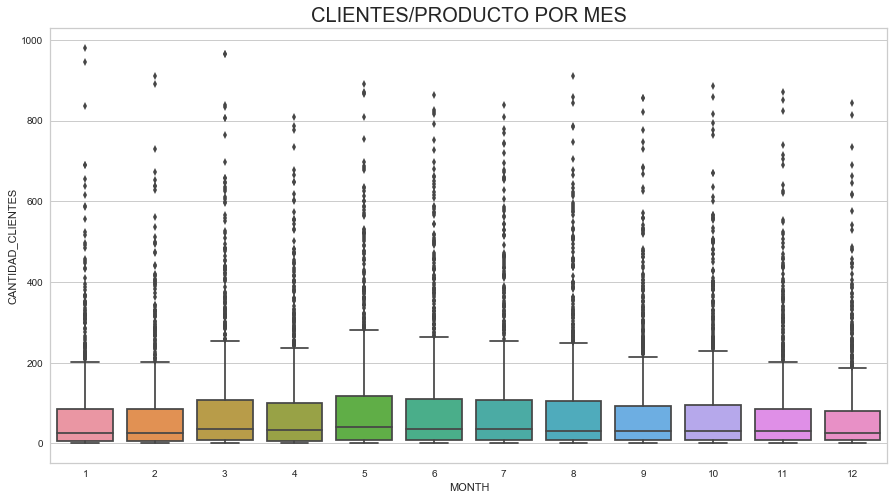

In [13]:
plt.clf()
fig, ax = plt.subplots(figsize=(15, 8))
sns.boxplot(ax=ax,x="MONTH", y="CANTIDAD_CLIENTES", data=ppc_df ).set_title("CLIENTES/PRODUCTO POR MES",fontsize=20);
plt.show()

<Figure size 1296x720 with 0 Axes>

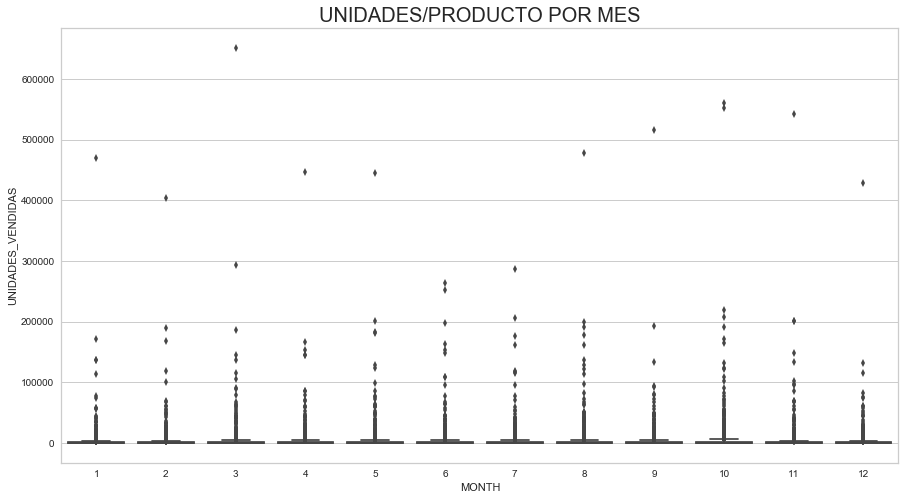

In [14]:
plt.clf()
fig, ax = plt.subplots(figsize=(15, 8))
sns.boxplot(ax=ax,x="MONTH", y="UNIDADES_VENDIDAS", data=ppc_df).set_title("UNIDADES/PRODUCTO POR MES",fontsize=20);
plt.show()


<Figure size 1296x720 with 0 Axes>

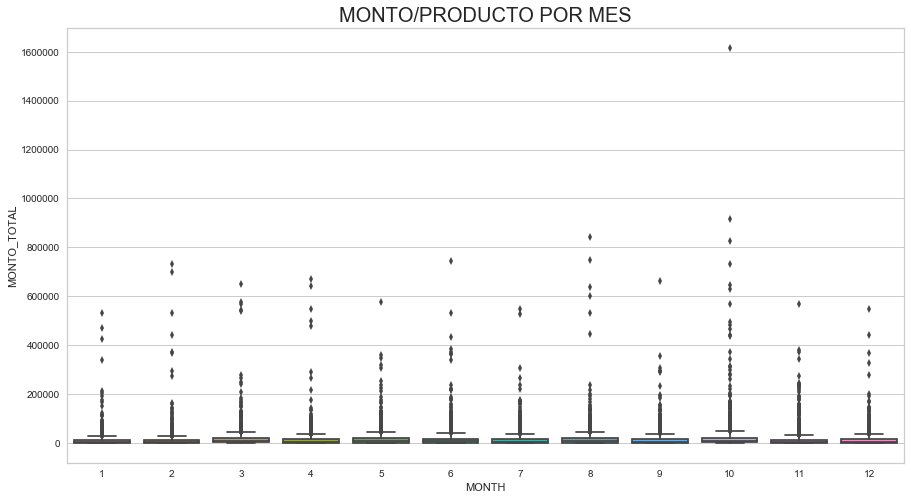

In [15]:
plt.clf()
fig, ax = plt.subplots(figsize=(15, 8))
sns.boxplot(ax=ax,x="MONTH", y="MONTO_TOTAL", data=ppc_df ).set_title("MONTO/PRODUCTO POR MES",fontsize=20);
plt.show()

<Figure size 1296x720 with 0 Axes>

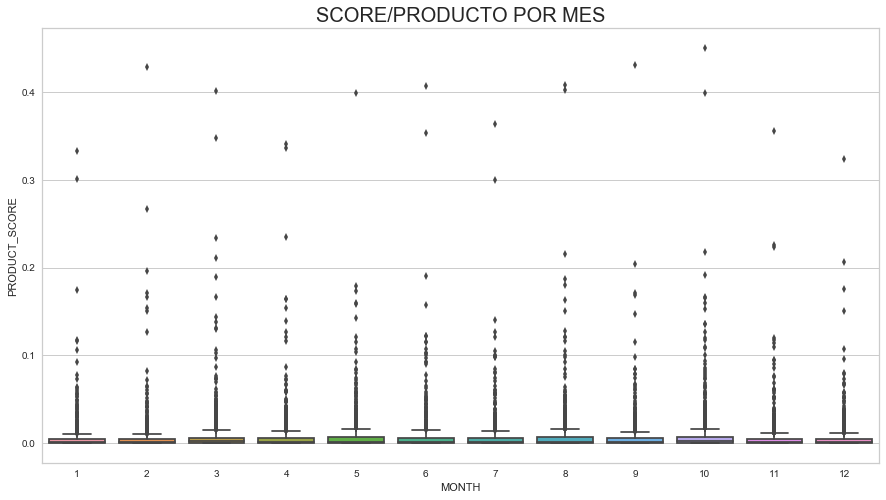

In [16]:
plt.clf()
fig, ax = plt.subplots(figsize=(15, 8))
sns.boxplot(ax=ax,x="MONTH", y="PRODUCT_SCORE", data=ppc_df).set_title("SCORE/PRODUCTO POR MES",fontsize=20);
plt.show()


In [17]:
display(len(ppc_df))

12807

In [18]:
with pd.option_context('display.float_format', lambda x: '{:,.3f}'.format(x)):
    display(ppc_df.PRODUCT_SCORE.describe())

count   12,807.000
mean         0.007
std          0.022
min          0.000
25%          0.000
50%          0.002
75%          0.006
max          0.451
Name: PRODUCT_SCORE, dtype: float64

# Eliminamos algunos outliers para mejorar la visualización:

In [19]:
# Removemos los outliers segun SCORE (que prioriza los tres valors de referencia) y revisamos:
ppc_r1_df = ppc_df[np.abs(ppc_df.PRODUCT_SCORE-ppc_df.PRODUCT_SCORE.mean()) <= (ppc_df.PRODUCT_SCORE.std()*3)]
display(len(ppc_r1_df))

12632

<Figure size 1296x720 with 0 Axes>

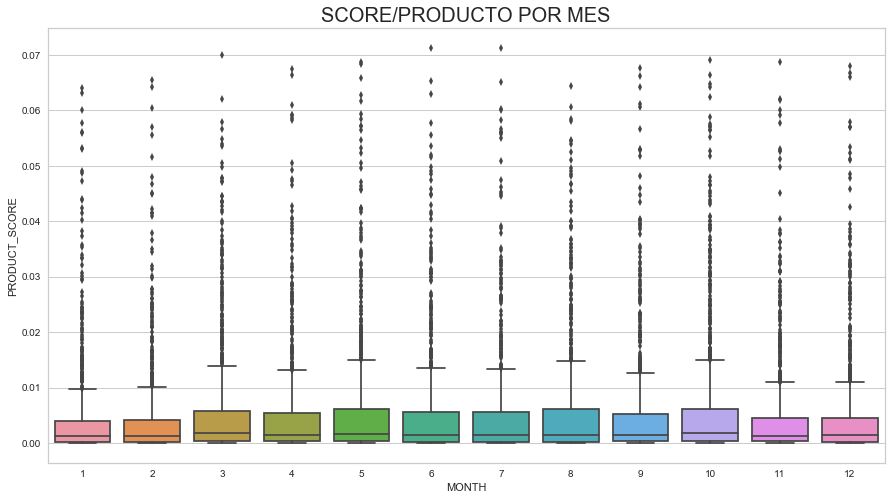

In [20]:
plt.clf()
fig, ax = plt.subplots(figsize=(15, 8))
sns.boxplot(ax=ax,x="MONTH", y="PRODUCT_SCORE", data=ppc_r1_df).set_title("SCORE/PRODUCTO POR MES",fontsize=20);
plt.show()

In [21]:
for x in range(1, 13):
  m = ppc_r1_df[ppc_r1_df['MONTH']==x]
  pm = str(len(m))
  display( HTML('<H2>* PRODUCTOS MES ' + str(x) + ':</H2>') )
  display( m.describe() )  
  display( HTML('<hr/>') )

,MONTH,CANTIDAD_CLIENTES,UNIDADES_VENDIDAS,MONTO_TOTAL,PRODUCT_SCORE
count,978.0,978.000000,978.000000,978.000000,978.000000
mean,1.0,64.494888,2434.212384,10589.586708,0.004273
std,0.0,94.069512,8563.052905,18439.151289,0.008480
min,1.0,1.000000,1.000000,0.460000,0.000000
25%,1.0,7.000000,60.250000,1457.295000,0.000219
50%,1.0,25.000000,367.500000,4396.400000,0.001204
75%,1.0,82.000000,1400.000000,11716.295000,0.004003
max,1.0,689.000000,172080.000000,192665.030000,0.064081


,MONTH,CANTIDAD_CLIENTES,UNIDADES_VENDIDAS,MONTO_TOTAL,PRODUCT_SCORE
count,968.0,968.000000,968.000000,968.000000,968.000000
mean,2.0,64.184917,2327.272839,11143.294318,0.004228
std,0.0,92.344606,8125.559953,20647.384102,0.008106
min,2.0,1.000000,1.000000,0.100000,0.000000
25%,2.0,7.000000,59.000000,1434.377500,0.000216
50%,2.0,27.000000,381.000000,4492.120000,0.001299
75%,2.0,81.250000,1453.000000,11472.765000,0.004201
max,2.0,652.000000,168840.000000,274052.480000,0.065476


,MONTH,CANTIDAD_CLIENTES,UNIDADES_VENDIDAS,MONTO_TOTAL,PRODUCT_SCORE
count,1053.0,1053.000000,1053.000000,1053.000000,1053.000000
mean,3.0,80.385565,2880.141214,15530.756477,0.005578
std,0.0,111.147204,8027.284186,24645.719876,0.009607
min,3.0,1.000000,1.000000,0.160000,0.000000
25%,3.0,8.000000,96.000000,2258.660000,0.000362
50%,3.0,36.000000,504.000000,6775.340000,0.001721
75%,3.0,104.000000,1996.000000,17907.450000,0.005825
max,3.0,658.000000,136800.000000,277870.940000,0.069889


,MONTH,CANTIDAD_CLIENTES,UNIDADES_VENDIDAS,MONTO_TOTAL,PRODUCT_SCORE
count,1010.0,1010.000000,1010.000000,1010.000000,1010.000000
mean,4.0,75.205941,2682.205501,12348.653475,0.004944
std,0.0,104.184345,8447.455424,18545.027028,0.009017
min,4.0,1.000000,1.000000,0.100000,0.000000
25%,4.0,7.000000,81.250000,1516.405000,0.000291
50%,4.0,32.000000,422.500000,5609.535000,0.001453
75%,4.0,96.000000,1766.250000,15163.945000,0.005434
max,4.0,603.000000,166440.000000,143963.830000,0.067410


,MONTH,CANTIDAD_CLIENTES,UNIDADES_VENDIDAS,MONTO_TOTAL,PRODUCT_SCORE
count,1004.0,1004.000000,1004.000000,1004.000000,1004.000000
mean,5.0,86.992032,3080.318613,15163.087799,0.005794
std,0.0,122.154520,9365.973987,25297.820799,0.010279
min,5.0,1.000000,1.000000,0.030000,0.000000
25%,5.0,8.000000,93.750000,1675.937500,0.000347
50%,5.0,40.000000,491.000000,6508.750000,0.001688
75%,5.0,112.000000,2063.500000,17770.380000,0.006194
max,5.0,892.000000,182742.000000,254672.380000,0.068780


,MONTH,CANTIDAD_CLIENTES,UNIDADES_VENDIDAS,MONTO_TOTAL,PRODUCT_SCORE
count,1019.0,1019.000000,1019.000000,1019.000000,1019.000000
mean,6.0,82.000000,2739.118406,15237.952856,0.005221
std,0.0,117.311744,7599.389195,28292.349576,0.009346
min,6.0,1.000000,1.000000,0.160000,0.000000
25%,6.0,8.000000,70.500000,1431.340000,0.000251
50%,6.0,34.000000,409.000000,6073.670000,0.001483
75%,6.0,107.000000,1850.000000,16178.215000,0.005658
max,6.0,697.000000,95280.000000,339329.750000,0.071254


,MONTH,CANTIDAD_CLIENTES,UNIDADES_VENDIDAS,MONTO_TOTAL,PRODUCT_SCORE
count,1001.0,1001.000000,1001.000000,1001.000000,1001.000000
mean,7.0,82.426573,2563.218479,14411.874655,0.005101
std,0.0,120.117871,6676.592056,25243.404785,0.009279
min,7.0,1.000000,1.000000,0.130000,0.000000
25%,7.0,8.000000,72.000000,1742.400000,0.000247
50%,7.0,35.000000,424.000000,5777.320000,0.001425
75%,7.0,103.000000,1879.000000,15277.960000,0.005515
max,7.0,810.000000,78165.000000,266937.320000,0.071283


,MONTH,CANTIDAD_CLIENTES,UNIDADES_VENDIDAS,MONTO_TOTAL,PRODUCT_SCORE
count,1072.0,1072.000000,1072.000000,1072.000000,1072.000000
mean,8.0,77.222015,3023.698798,15511.442789,0.005454
std,0.0,112.120563,10025.369619,24355.464174,0.009614
min,8.0,1.000000,1.000000,0.200000,0.000000
25%,8.0,7.000000,67.750000,1949.902500,0.000235
50%,8.0,30.000000,389.500000,6708.960000,0.001433
75%,8.0,101.000000,1950.250000,18517.730000,0.006099
max,8.0,677.000000,200160.000000,218121.650000,0.064425


,MONTH,CANTIDAD_CLIENTES,UNIDADES_VENDIDAS,MONTO_TOTAL,PRODUCT_SCORE
count,1117.0,1117.000000,1117.00000,1117.000000,1117.000000
mean,9.0,74.643688,2621.43842,13893.286876,0.004852
std,0.0,108.776341,7896.13183,25054.295224,0.008898
min,9.0,1.000000,1.00000,0.230000,0.000000
25%,9.0,8.000000,93.00000,1906.370000,0.000339
50%,9.0,31.000000,384.00000,5673.240000,0.001403
75%,9.0,88.000000,1642.00000,15571.310000,0.005262
max,9.0,857.000000,133080.00000,307282.880000,0.067557


,MONTH,CANTIDAD_CLIENTES,UNIDADES_VENDIDAS,MONTO_TOTAL,PRODUCT_SCORE
count,1168.0,1168.000000,1168.000000,1168.000000,1168.000000
mean,10.0,71.748288,3202.340088,20786.192543,0.005972
std,0.0,101.363024,9393.361875,48513.426892,0.010382
min,10.0,1.000000,1.000000,0.340000,0.000000
25%,10.0,8.000000,95.500000,2171.707500,0.000356
50%,10.0,29.500000,500.500000,7390.610000,0.001788
75%,10.0,91.000000,2274.000000,19649.635000,0.006189
max,10.0,610.000000,131730.000000,916499.890000,0.069045


,MONTH,CANTIDAD_CLIENTES,UNIDADES_VENDIDAS,MONTO_TOTAL,PRODUCT_SCORE
count,1152.0,1152.000000,1152.000000,1152.000000,1152.000000
mean,11.0,66.136285,2537.948688,15019.518863,0.004504
std,0.0,95.125385,9322.883988,31483.757411,0.008372
min,11.0,1.000000,1.000000,0.040000,0.000000
25%,11.0,8.000000,76.000000,1858.307500,0.000286
50%,11.0,29.000000,358.500000,5211.100000,0.001280
75%,11.0,83.000000,1485.000000,13873.362500,0.004565
max,11.0,851.000000,200880.000000,345195.870000,0.068727


,MONTH,CANTIDAD_CLIENTES,UNIDADES_VENDIDAS,MONTO_TOTAL,PRODUCT_SCORE
count,1090.0,1090.000000,1090.000000,1090.000000,1090.000000
mean,12.0,62.329358,2289.643848,14346.196339,0.004619
std,0.0,90.847751,6293.343912,23985.671953,0.008778
min,12.0,1.000000,1.000000,6.000000,0.000000
25%,12.0,8.000000,69.000000,1883.945000,0.000265
50%,12.0,27.000000,386.000000,6096.705000,0.001423
75%,12.0,78.000000,1510.000000,16023.755000,0.004559
max,12.0,844.000000,82080.000000,278731.700000,0.068071


# Generamos la tabla con los datos dispuestos para clusterizar

In [22]:
ppc_c_df = ( data_df[['CODIGO_CLIENTE', 'MONTH', 'CODIGO_ARTICULO', 'CANTIDAD']]
        .groupby(['CODIGO_CLIENTE', 'MONTH', 'CODIGO_ARTICULO'])
        .agg({ 'CANTIDAD': 'sum'})
        .reset_index()
        .rename(columns={'CANTIDAD':'UNIDADES_VENDIDAS'})
    )   
ppc_c_df.head()

,CODIGO_CLIENTE,MONTH,CODIGO_ARTICULO,UNIDADES_VENDIDAS
0,0024531e81828540871212e10c896d71,1,000-000-10161,24.0
1,0024531e81828540871212e10c896d71,1,000-000-10170,2.0
2,0024531e81828540871212e10c896d71,1,000-000-10204,7.0
3,0024531e81828540871212e10c896d71,1,000-000-10636,36.0
4,0024531e81828540871212e10c896d71,1,000-000-10637,18.0


In [23]:
# Ok, ahora obtenemos cantidades de productos por clientes en una matriz
ppcp_df = ppc_c_df.pivot_table(index='CODIGO_CLIENTE', columns=['CODIGO_ARTICULO', 'MONTH'], values='UNIDADES_VENDIDAS').fillna(0)

In [24]:
ppcp_df.shape

(2443, 12807)

In [25]:
ppcp_df.head()

CODIGO_ARTICULO                  000-000-0236                                \
MONTH                                      1    2    3    4    5    6    7    
CODIGO_CLIENTE                                                                
0024531e81828540871212e10c896d71          0.0  0.0  0.0  0.0  0.0  0.0  0.0   
003c44afe6e90ba8848dfd2bdd92c03f          0.0  0.0  0.0  0.0  0.0  0.0  0.0   
004a4de5dd7ab3c72b8f86fe635bb9b8          0.0  0.0  0.0  0.0  0.0  0.0  0.0   
00a1e834d044753f4e47964143a5e904          0.0  0.0  0.0  0.0  0.0  0.0  0.0   
00bb302b07a498a606e061579e962c45          0.0  0.0  0.0  0.0  0.0  0.0  0.0   

CODIGO_ARTICULO                            000-000-0241      ...       \
MONTH                              8    9            1       ...        
CODIGO_CLIENTE                                               ...        
0024531e81828540871212e10c896d71  0.0  0.0          0.0      ...        
003c44afe6e90ba8848dfd2bdd92c03f  0.0  0.0          0.0      ...        
004a4de5dd7ab3c72b8f86fe635bb9b8  0.0  0.0          0.0      ...        
00a1e834d044753f4e47964143a5e904  0.0  0.0          0.0      ...        
00bb302b07a498a606e061579e962c45  0.0  0.0          0.0      ...        

CODIGO_ARTICULO                  000-999-c11857      000-999-c3436            \
MONTH                                        10   11            8    9    10   
CODIGO_CLIENTE                                                                 
0024531e81828540871212e10c896d71            0.0  0.0           0.0  0.0  0.0   
003c44afe6e90ba8848dfd2bdd92c03f            0.0  0.0           0.0  0.0  0.0   
004a4de5dd7ab3c72b8f86fe635bb9b8            0.0  0.0           0.0  0.0  0.0   
00a1e834d044753f4e47964143a5e904            0.0  0.0           0.0  0.0  0.0   
00bb302b07a498a606e061579e962c45            0.0  0.0           0.0  0.0  0.0   

CODIGO_ARTICULO                  000-999-c3747           000-999-d4532  \
MONTH                                       9    10   11            4    
CODIGO_CLIENTE                                                           
0024531e81828540871212e10c896d71           0.0  0.0  0.0           0.0   
003c44afe6e90ba8848dfd2bdd92c03f           0.0  0.0  0.0           0.0   
004a4de5dd7ab3c72b8f86fe635bb9b8           0.0  0.0  0.0           0.0   
00a1e834d044753f4e47964143a5e904           0.0  0.0  0.0           0.0   
00bb302b07a498a606e061579e962c45           0.0  0.0  0.0           0.0   

CODIGO_ARTICULO                  000-999-d5883  
MONTH                                       4   
CODIGO_CLIENTE                                  
0024531e81828540871212e10c896d71           0.0  
003c44afe6e90ba8848dfd2bdd92c03f           0.0  
004a4de5dd7ab3c72b8f86fe635bb9b8           0.0  
00a1e834d044753f4e47964143a5e904           0.0  
00bb302b07a498a606e061579e962c45           0.0  

[5 rows x 12807 columns]

In [26]:
# Normalizamos los datos:

# Normalizacion Min-Max:
#ppcp_norm=(ppcp_df-ppcp_df.min())/(ppcp_df.max()-ppcp_df.min())

# Los datos resultantes presentan diferencias muy grandes. Probaremos la normalizacion logarítmica.

# Normalizacion Logarítmica
ppcp_log_norm = np.log((1+ppcp_df)/2)

In [27]:
ppcp_log_norm.describe()

CODIGO_ARTICULO 000-000-0236                                         \
MONTH                     1            2            3            4    
count            2443.000000  2443.000000  2443.000000  2443.000000   
mean               -0.692414    -0.690786    -0.692414    -0.692414   
std                 0.026276     0.054978     0.026276     0.026276   
min                -0.693147    -0.693147    -0.693147    -0.693147   
25%                -0.693147    -0.693147    -0.693147    -0.693147   
50%                -0.693147    -0.693147    -0.693147    -0.693147   
75%                -0.693147    -0.693147    -0.693147    -0.693147   
max                 0.405465     0.916291     0.405465     0.405465   

CODIGO_ARTICULO                                                      \
MONTH                     5            6            7            8    
count            2443.000000  2443.000000  2443.000000  2443.000000   
mean               -0.692130    -0.691563    -0.691846    -0.690502   
std                 0.035780     0.035759     0.032906     0.056727   
min                -0.693147    -0.693147    -0.693147    -0.693147   
25%                -0.693147    -0.693147    -0.693147    -0.693147   
50%                -0.693147    -0.693147    -0.693147    -0.693147   
75%                -0.693147    -0.693147    -0.693147    -0.693147   
max                 0.693147     0.405465     0.405465     0.916291   

CODIGO_ARTICULO              000-000-0241      ...      000-999-c11857  \
MONTH                     9            1       ...                  10   
count            2443.000000  2443.000000      ...         2443.000000   
mean               -0.690856    -0.669155      ...           -0.683248   
std                 0.052297     0.233931      ...            0.107758   
min                -0.693147    -0.693147      ...           -0.693147   
25%                -0.693147    -0.693147      ...           -0.693147   
50%                -0.693147    -0.693147      ...           -0.693147   
75%                -0.693147    -0.693147      ...           -0.693147   
max                 0.916291     3.198673      ...            2.525729   

CODIGO_ARTICULO              000-999-c3436                            \
MONTH                     11            8            9            10   
count            2443.000000   2443.000000  2443.000000  2443.000000   
mean               -0.692697     -0.683565    -0.681207    -0.685159   
std                 0.022227      0.109297     0.132253     0.090394   
min                -0.693147     -0.693147    -0.693147    -0.693147   
25%                -0.693147     -0.693147    -0.693147    -0.693147   
50%                -0.693147     -0.693147    -0.693147    -0.693147   
75%                -0.693147     -0.693147    -0.693147    -0.693147   
max                 0.405465      1.871802     2.525729     0.916291   

CODIGO_ARTICULO 000-999-c3747                           000-999-d4532  \
MONTH                      9            10           11            4    
count             2443.000000  2443.000000  2443.000000   2443.000000   
mean                -0.690758    -0.685571    -0.689961     -0.690331   
std                  0.068162     0.151060     0.096403      0.066850   
min                 -0.693147    -0.693147    -0.693147     -0.693147   
25%                 -0.693147    -0.693147    -0.693147     -0.693147   
50%                 -0.693147    -0.693147    -0.693147     -0.693147   
75%                 -0.693147    -0.693147    -0.693147     -0.693147   
max                  1.252763     4.283587     3.198673      1.504077   

CODIGO_ARTICULO 000-999-d5883  
MONTH                      4   
count             2443.000000  
mean                -0.685895  
std                  0.141410  
min                 -0.693147  
25%                 -0.693147  
50%                 -0.693147  
75%                 -0.693147  
max                  3.526361  

[8 rows x 12807 columns]

<Figure size 1296x720 with 0 Axes>

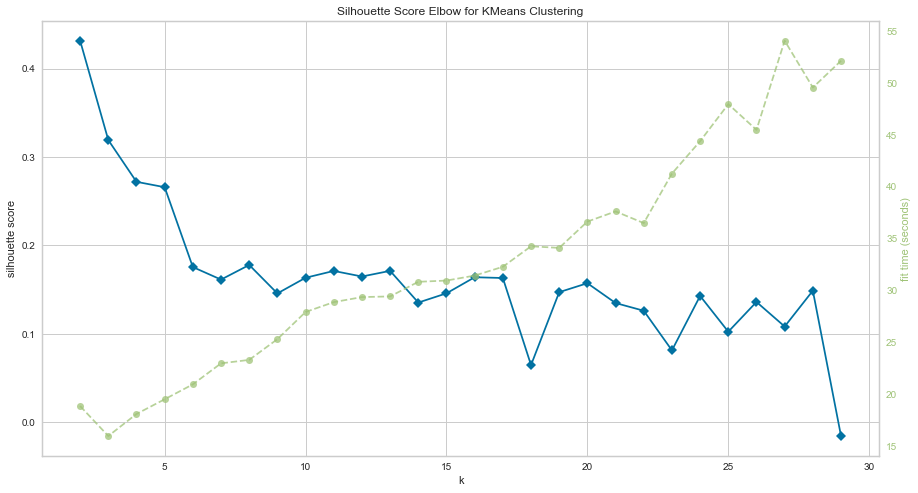

In [46]:
# Clusterizamos los clientes segun la similaridad de los productos que compran
plt.clf()
fig, ax = plt.subplots(figsize=(15, 8))
clusterClientes = KElbowVisualizer(KMeans(), k=(2,30), metric='silhouette',random_state=0)
clusterClientes.fit(ppcp_log_norm)
clusterClientes.poof()
plt.show()

Probamos con otra semilla:

<Figure size 1296x720 with 0 Axes>

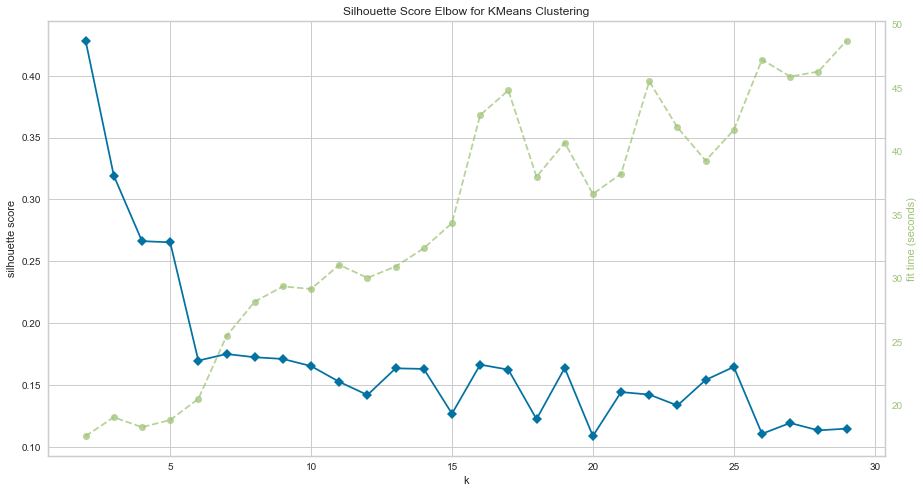

In [47]:
# Clusterizamos los clientes segun la similaridad de los productos que compran
plt.clf()
fig, ax = plt.subplots(figsize=(15, 8))
clusterClientes = KElbowVisualizer(KMeans(), k=(2,30), metric='silhouette',random_state=3425)
clusterClientes.fit(ppcp_log_norm)
clusterClientes.poof()
plt.show()

Nos quedamos con el resultado de la segunda semilla. Obtenemos los resultados con k=6.

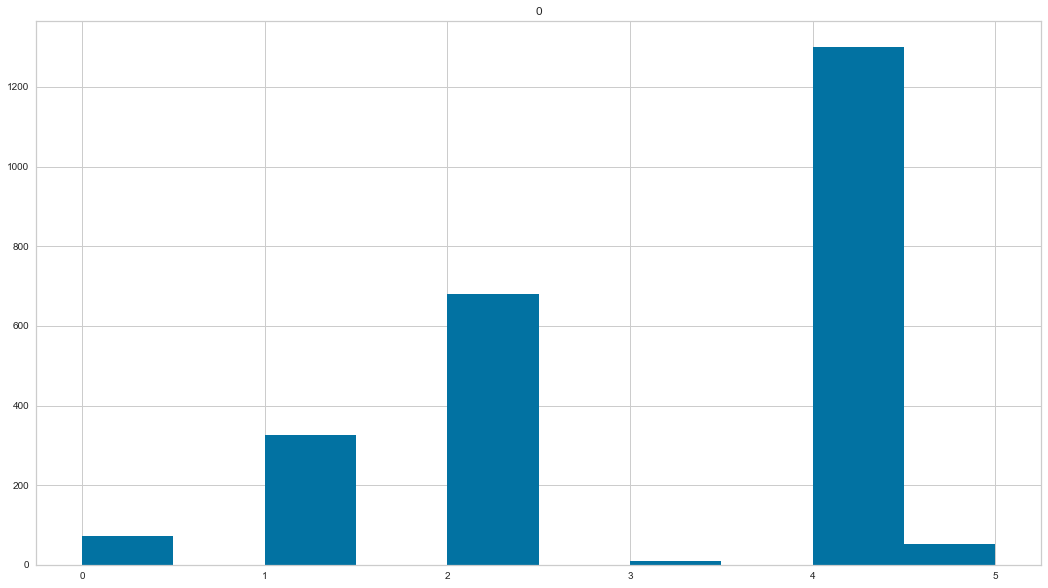

In [50]:
num_clusters = 6

# Ejecutamos la clusterización por la cantidad de clusters seleccionada:
ppcp_kmeans = KMeans(n_clusters=num_clusters,random_state=3425)
ppcp_clusters = ppcp_kmeans.fit_predict(ppcp_log_norm)

ppcp_clusters_df = pd.DataFrame(ppcp_clusters)
ppcp_clusters_df.hist()
plt.show()

In [101]:
unique, counts = np.unique(ppcp_clusters, return_counts=True)

In [104]:
display(HTML('<H1># CLIENTES POR CLUSTER</H1>'))
clusters_info_df = pd.DataFrame( np.transpose([np.array(range(len(counts))), counts]), columns=['CLUSTER', 'COUNT'])
clusters_info_df

,CLUSTER,COUNT
0,0,73
1,1,327
2,2,680
3,3,10
4,4,1300
5,5,53


Se generaron grupos pero estan desbalanceados. Veremos de reducir la dimensionalidad y reintentaremos a ver que sucede.

Dividimos el notebook para simplificar sus ejecuciones. Guardamos entonces los datos procesados para utilizar en los siguientes notebooks: 

In [105]:
ppcp_df.to_csv('clustering-1-datos-preprocesados.csv')

In [106]:
ppcp_log_norm.to_csv('clustering-1-datos-normalizados.csv')

In [107]:
ppcp_clusters_df.to_csv('clustering-1-datos-clusters.csv')